In [1]:
# Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# Loading the 1st data:

df1 =pd.read_csv("/content/Indian _automobile_buying_behaviour_study.csv")
df = df1.copy()

In [3]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [4]:
df.shape

(99, 13)

In [5]:
# checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
# checking null values

df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [7]:
# checking columns

df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [8]:
# Checking unique values

uniq_columns = ["Age","Profession", "Marrital Status", "Education","No of Dependents", "Personal loan", "House Loan", "Wife Working", "Make"]

for column in uniq_columns:
    print(f"Unique values in {column}:  {df[column].unique()}\n")


Unique values in Age:  [27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]

Unique values in Profession:  ['Salaried' 'Business']

Unique values in Marrital Status:  ['Single' 'Married']

Unique values in Education:  ['Post Graduate' 'Graduate']

Unique values in No of Dependents:  [0 2 4 3]

Unique values in Personal loan:  ['Yes' 'No']

Unique values in House Loan:  ['No' 'Yes']

Unique values in Wife Working:  ['No' 'Yes']

Unique values in Make:  ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']



In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,99.0,3.631313e+01,6.246054e+00,26.0,31.0,36.0,41.0,51.0
No of Dependents,99.0,2.181818e+00,1.335265e+00,0.0,2.0,2.0,3.0,4.0
Salary,99.0,1.736364e+06,6.736217e+05,200000.0,1300000.0,1600000.0,2200000.0,3800000.0
Wife Salary,99.0,5.343434e+05,6.054450e+05,0.0,0.0,500000.0,900000.0,2100000.0
Total Salary,99.0,2.270707e+06,1.050777e+06,200000.0,1550000.0,2100000.0,2700000.0,5200000.0
Price,99.0,1.194040e+06,4.376955e+05,110000.0,800000.0,1200000.0,1500000.0,3000000.0


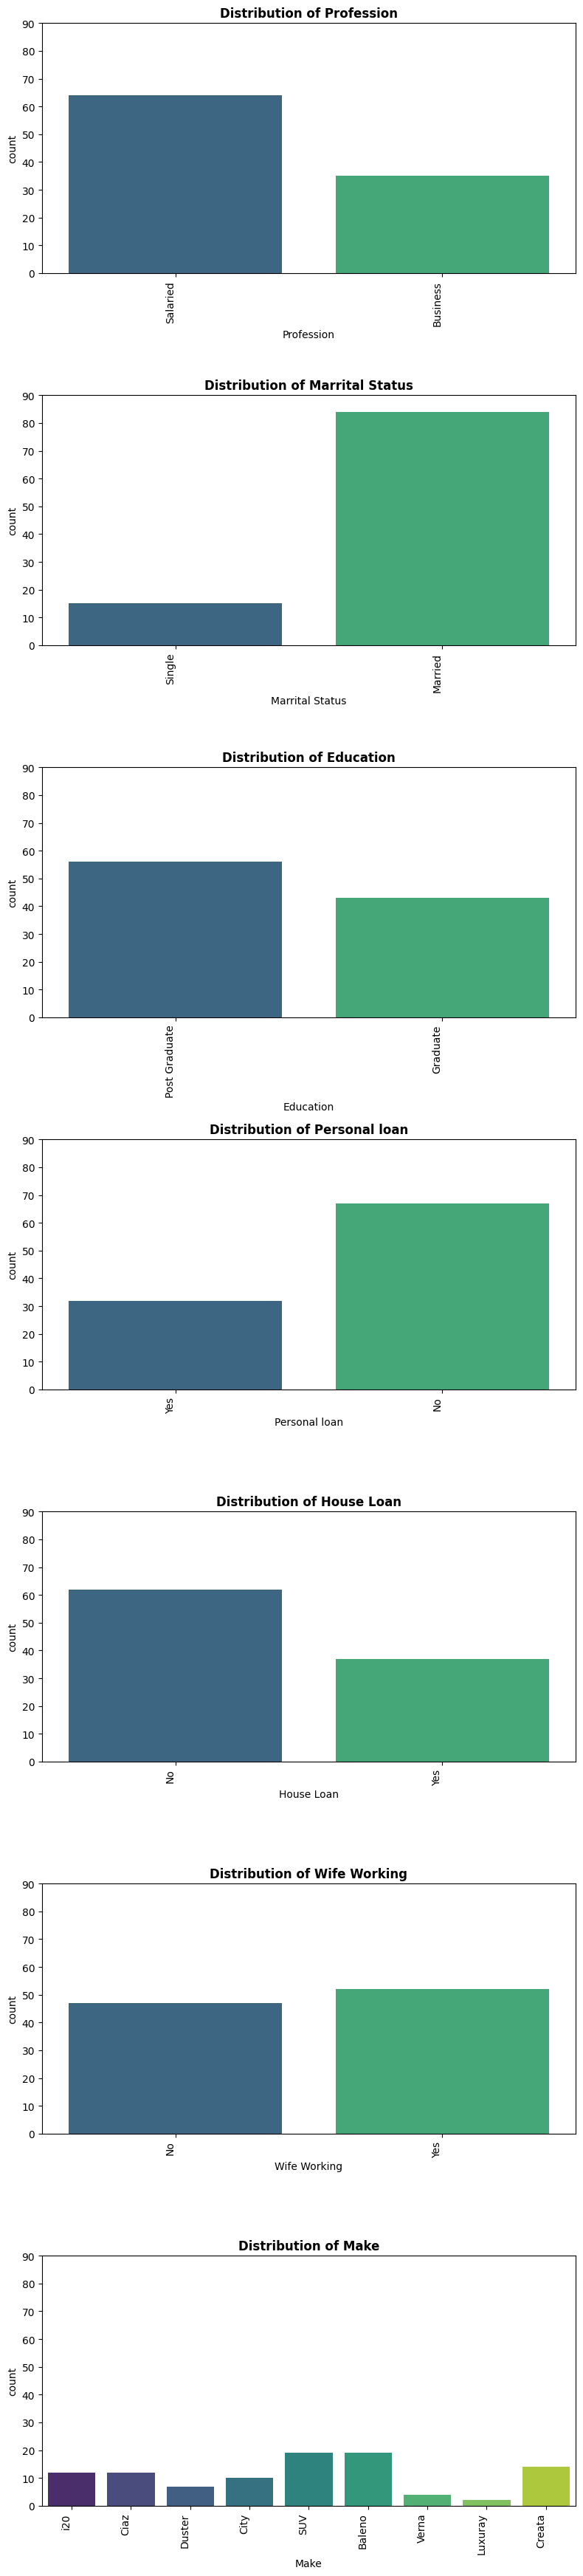

In [10]:
# Categorical columns to plot

cat_columns = ["Profession", "Marrital Status", "Education", "Personal loan", "House Loan", "Wife Working", "Make"]

# Set up subplots
fig, axes = plt.subplots(nrows=len(cat_columns), ncols=1, figsize=(8, 5 * len(cat_columns)))

# Plot each categorical column
for i, col in enumerate(cat_columns):
    sns.countplot(x=col, data=df, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}',fontsize = 12, fontweight = "bold")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
    axes[i].set_yticks(range(0, 91, 10))

# Adjust layout
plt.tight_layout()
plt.show()

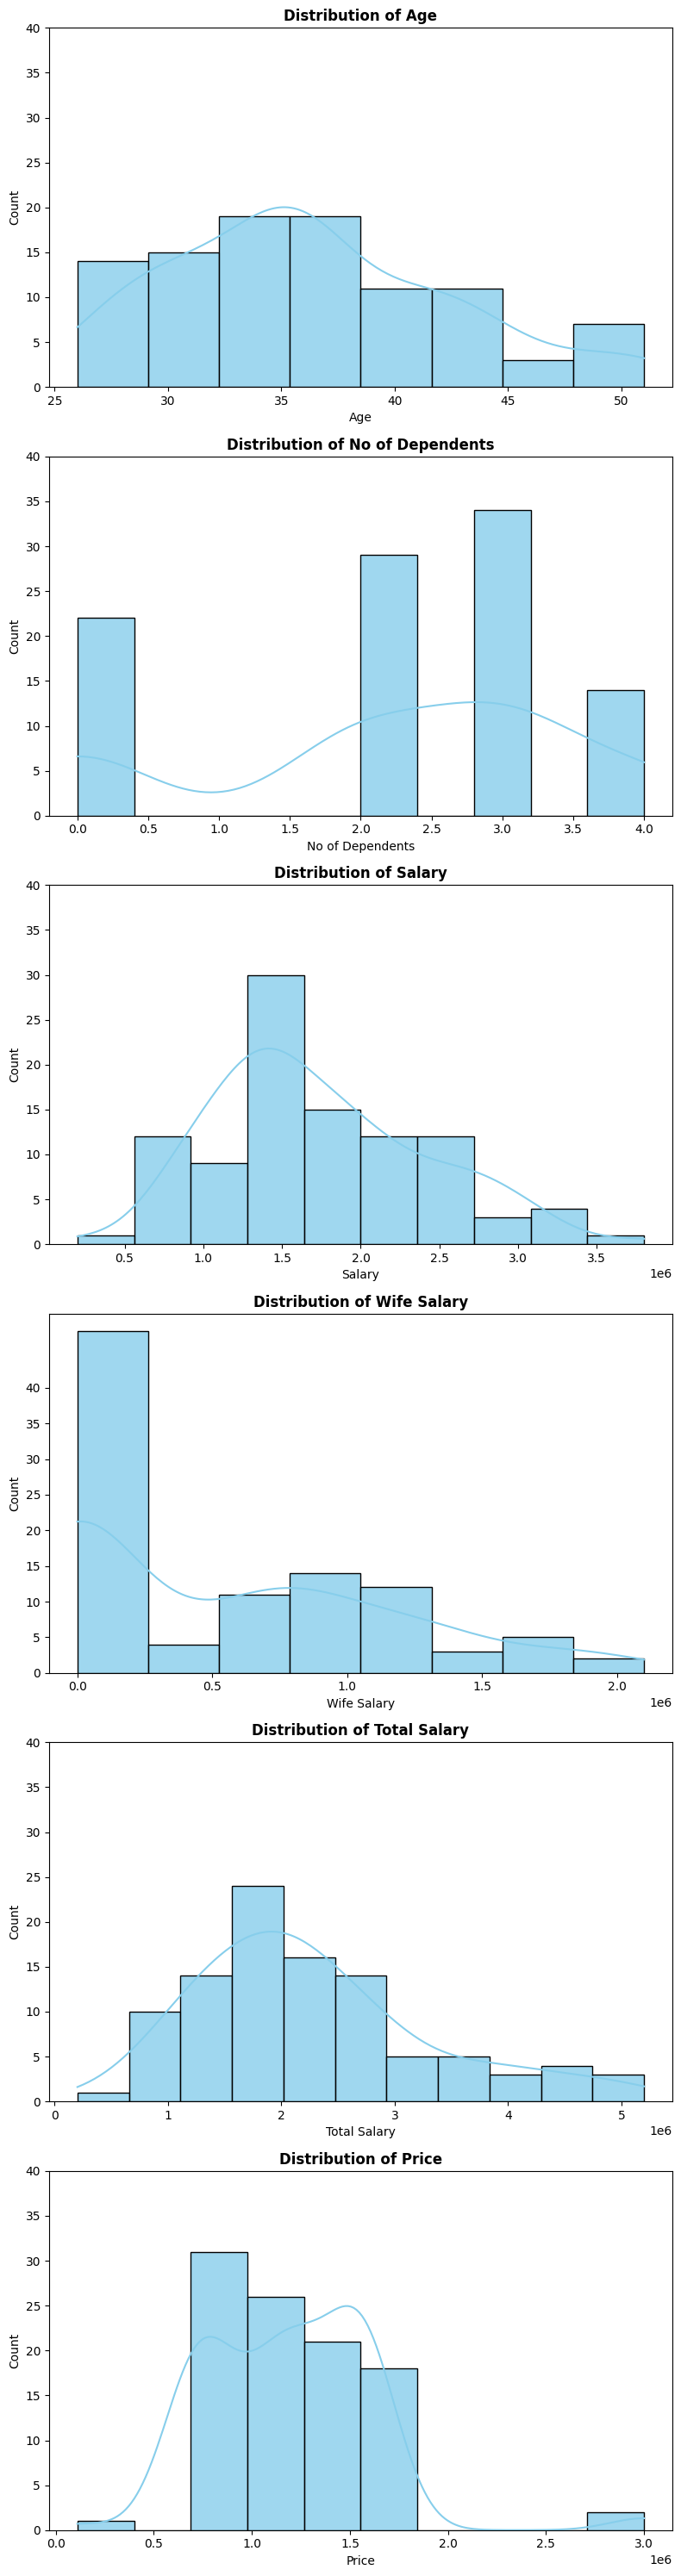

In [11]:
# numerical columns to plot
num_columns = ["Age", "No of Dependents", "Salary", "Wife Salary", "Total Salary", "Price"]

# Set up subplots
fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(8, 5 * len(num_columns)))

# Plot each numerical column
for i, col in enumerate(num_columns):
    sns.histplot(df[col], kde=True, color='skyblue', alpha=0.8, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}',fontsize = 12, fontweight = "bold")
    axes[i].set_yticks(range(0, 41, 5))

# Adjust layout
plt.tight_layout()
plt.show()

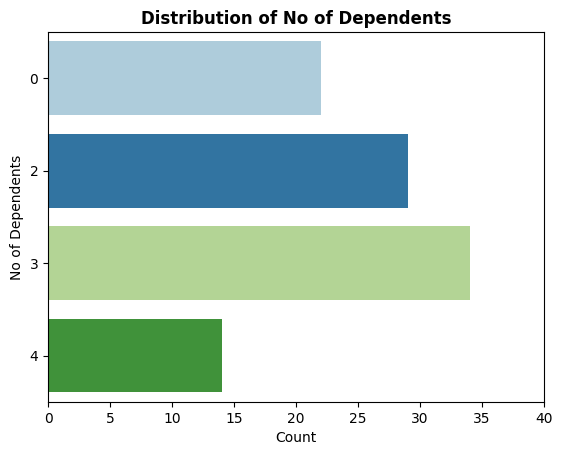

In [12]:
# Dependents distribution

sns.countplot(y = "No of Dependents",data = df, palette= "Paired")
plt.title("Distribution of No of Dependents",fontsize = 12, fontweight = "bold")
plt.xlabel("Count")
plt.xticks(range(0,41,5))
plt.show()

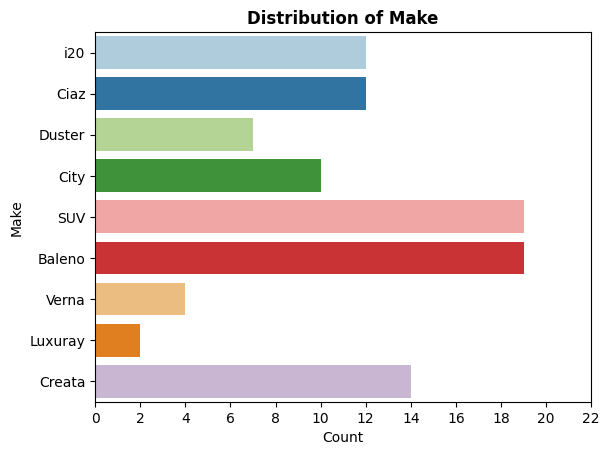

In [13]:
# car make distribution

sns.countplot(y ="Make",data = df, palette= "Paired")
plt.title("Distribution of Make", fontsize=12, fontweight="bold")
plt.xlabel("Count")
plt.xticks(range(0,23,2))
plt.show()

In [14]:
# Value counts for numerical columns

for column in num_columns:
    print(f"\nValue counts for {column}:\n{df[column].value_counts()}\n")



Value counts for Age:
36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: Age, dtype: int64


Value counts for No of Dependents:
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64


Value counts for Salary:
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
800000      4
2000000     4
3100000     4
1200000     3
1700000     3
2400000     3
2900000     2
2100000     2
1500000     2
2500000     2
200000      1
2600000     1
2300000     1
2800000     1
3800000     1
Name: Salary, dtype: int64


Value counts for Wife Salary:
0          48
800000      8
1300000     7
700000      6
600000      5
1100000     5
900000      5
1800000     5
500000      3
1400000     3
400000      1
2000000     1
1000000     1
2100000     1
Name: Wife Salary, dtype: int64

In [15]:
# Value counts for categorical columns

for column in cat_columns:
    print(f"\nValue counts for {column}:\n{df[column].value_counts()}\n")



Value counts for Profession:
Salaried    64
Business    35
Name: Profession, dtype: int64


Value counts for Marrital Status:
Married    84
Single     15
Name: Marrital Status, dtype: int64


Value counts for Education:
Post Graduate    56
Graduate         43
Name: Education, dtype: int64


Value counts for Personal loan:
No     67
Yes    32
Name: Personal loan, dtype: int64


Value counts for House Loan:
No     62
Yes    37
Name: House Loan, dtype: int64


Value counts for Wife Working:
Yes    52
No     47
Name: Wife Working, dtype: int64


Value counts for Make:
SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64



In [16]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

cat_columns = ["Profession", "Marrital Status", "Education", "Personal loan", "House Loan", "Wife Working", "Make"]

# Apply label encoding to each column
df[cat_columns] = df[cat_columns].apply(lambda col: le.fit_transform(col))

print(df.head())


   Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary  Make    Price  
0        800000     8   800000  
1       2000000     1  1000000  
2       1800000     4  1200000  
3       2200000     2  1200000  
4       2600000  

In [17]:
# After label encoding:

df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6,1600000
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6,1600000
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1,1100000
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3,1500000


In [18]:
# correlation matrix

df.corr()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
Age,1.000000,-0.003537,-0.551688,0.073667,0.543675,-0.007021,0.182816,0.060924,0.656442,0.288546,0.587082,0.042149,0.376661
Profession,-0.003537,1.000000,-0.041071,0.161896,-0.057834,0.059321,0.090875,0.143176,0.194599,0.129851,0.199570,-0.009688,0.125732
Marrital Status,-0.551688,-0.041071,1.000000,0.029279,-0.609181,0.009126,-0.326446,-0.388071,-0.312964,-0.374849,-0.416615,-0.031003,-0.149477
Education,0.073667,0.161896,0.029279,1.000000,0.012550,-0.047972,-0.039144,-0.016901,0.108356,0.049959,0.098250,0.125963,0.058201
No of Dependents,0.543675,-0.057834,-0.609181,0.012550,1.000000,0.149263,0.318605,0.038757,0.273921,0.102010,0.234379,0.003765,0.088822
Personal loan,-0.007021,0.059321,0.009126,-0.047972,0.149263,1.000000,0.537486,-0.207943,0.010839,-0.254515,-0.139700,-0.126521,-0.332734
House Loan,0.182816,0.090875,-0.326446,-0.039144,0.318605,0.537486,1.000000,-0.018160,0.216651,-0.002451,0.137476,-0.028875,-0.171616
Wife Working,0.060924,0.143176,-0.388071,-0.016901,0.038757,-0.207943,-0.018160,1.000000,0.027438,0.843330,0.503506,0.199531,0.400391
Salary,0.656442,0.194599,-0.312964,0.108356,0.273921,0.010839,0.216651,0.027438,1.000000,0.347934,0.841545,0.195252,0.547630
Wife Salary,0.288546,0.129851,-0.374849,0.049959,0.102010,-0.254515,-0.002451,0.843330,0.347934,1.000000,0.799238,0.280006,0.635858


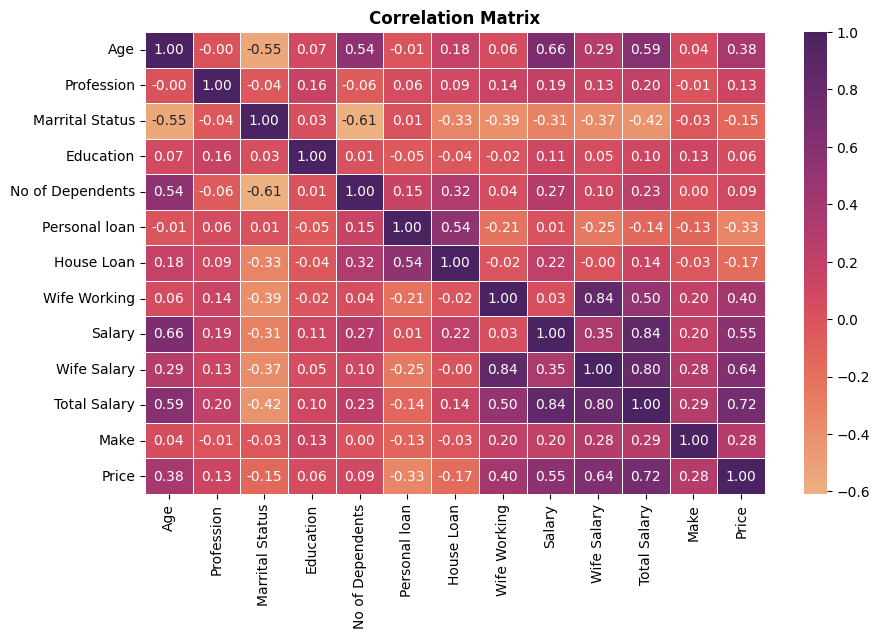

In [19]:
# Heatmap correlation:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True, cmap = "flare", fmt = ".2f",linewidths =0.5 )
plt.title("Correlation Matrix",fontsize = 12, fontweight = "bold")
plt.show()

In [20]:
# Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selection of target variable
y = df["Total Salary"]
x = df.drop(["Total Salary"], axis=1).copy()

def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


In [21]:
# Calculate and display VIF

columns_to_exclude = ["Marrital Status"]
x_for_vif = x.drop(columns=columns_to_exclude)

vif_result = calc_vif(x_for_vif)
vif_result

,Variables,VIF
0,Age,30.609571
1,Profession,3.223921
2,Education,2.440283
3,No of Dependents,5.368996
4,Personal loan,2.290233
5,House Loan,2.736469
6,Wife Working,9.655871
7,Salary,21.589191
8,Wife Salary,10.066945
9,Make,2.945212


In [22]:
# k-Means model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns for clustering
features_for_clustering = df[['Age', 'No of Dependents','Salary','Wife Salary','Price']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)



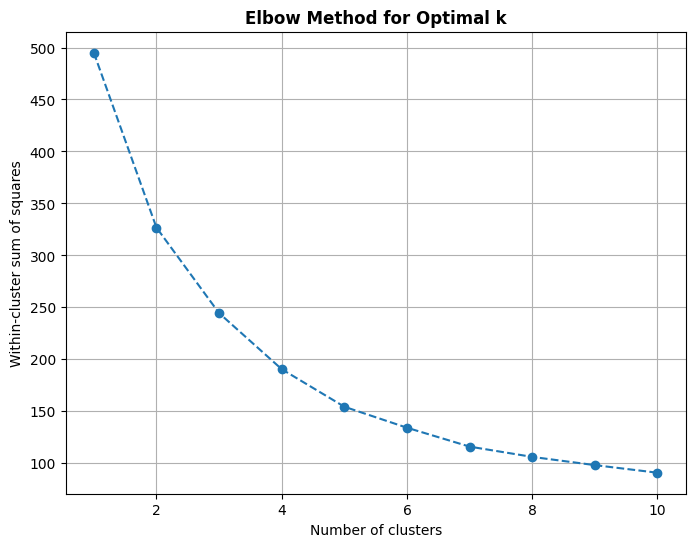

In [23]:
# Determine the optimal number of clusters using the Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k',fontsize = 12, fontweight = "bold")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.grid()
plt.show()

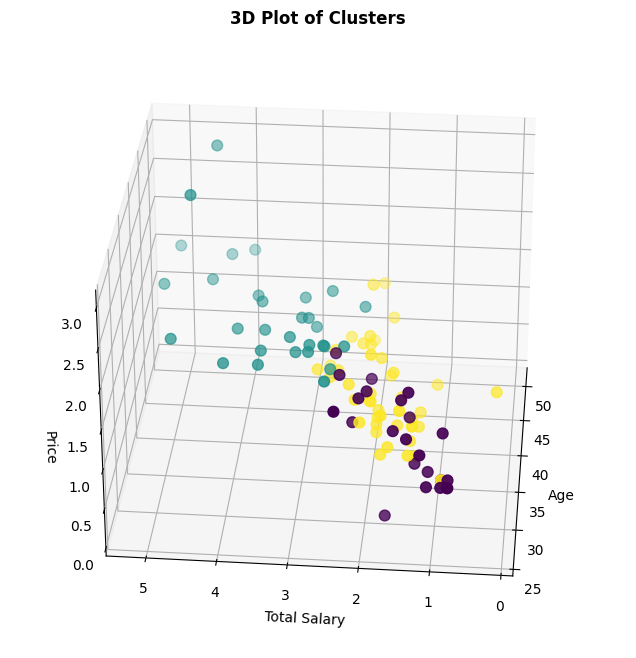

In [24]:
# Based on the Elbow method, choose the optimal number of clusters
optimal_k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df1['Cluster'] = kmeans.fit_predict(scaled_features)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3d plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Total Salary'], df['Price'], c=df['Cluster'], cmap='viridis', s=60)

ax.view_init(30,185)
ax.set_xlabel('Age')
ax.set_ylabel('Total Salary')
ax.set_zlabel('Price')

plt.title('3D Plot of Clusters',fontsize = 12, fontweight = "bold")
plt.show()


In [25]:
# printing data and shape

print(df.head(),"\n\n\n","shape: ",df.shape)

   Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0              1           0             0   800000            0   
1              1           1             1  1400000       600000   
2              1           1             0  1800000            0   
3              0           0             1  1600000       600000   
4              1           0             1  1800000       800000   

   Total Salary  Make    Price  Cluster  
0        800000     8   800000        0  
1       2000000     1  1000000        2  
2       1800000     4  1200000        2  
3       220000

In [26]:
df2 = df1.copy()
df2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,1


In [27]:
# value counts

df2["Cluster"].value_counts()

2    46
1    30
0    23
Name: Cluster, dtype: int64

In [28]:
# Segregate data into clusters:

cluster_0=df2[df2["Cluster"]==0]
cluster_1=df2[df2["Cluster"]==1]
cluster_2=df2[df2["Cluster"]==2]

In [29]:
# checking shape

print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)

(23, 14)
(30, 14)
(46, 14)


In [30]:
[cluster_0["Price"].mean(),
 cluster_1["Price"].mean(),
 cluster_2["Price"].mean()]

[1083043.4782608696, 1630000.0, 965217.3913043478]

# **Cluster 1** customers have the **Highest Average purchase Price (Rs. 1630000.00)**, followed by Cluster 0 & 2 have the lower Average purchase Price

In [31]:
[cluster_0["Marrital Status"].value_counts().head(),
 cluster_1["Marrital Status"].value_counts().head(),
 cluster_2["Marrital Status"].value_counts().head()]

[Single     14
 Married     9
 Name: Marrital Status, dtype: int64,
 Married    30
 Name: Marrital Status, dtype: int64,
 Married    45
 Single      1
 Name: Marrital Status, dtype: int64]

In [32]:
ms = cluster_2[cluster_2["Marrital Status"]== "Married"]
ms["Make"].value_counts()

Baleno    13
Ciaz       9
i20        9
City       6
Duster     4
Verna      3
SUV        1
Name: Make, dtype: int64

# **Married** Status people should be Targeted

In [33]:
[cluster_0["Profession"].value_counts().head(),
 cluster_1["Profession"].value_counts().head(),
 cluster_2["Profession"].value_counts().head()]

[Salaried    15
 Business     8
 Name: Profession, dtype: int64,
 Salaried    22
 Business     8
 Name: Profession, dtype: int64,
 Salaried    27
 Business    19
 Name: Profession, dtype: int64]

# **Salaried** people are more interested in buying cars

In [34]:
[cluster_0["Total Salary"].mean(),
 cluster_1["Total Salary"].mean(),
 cluster_2["Total Salary"].mean()]


[1495652.1739130435, 3523333.3333333335, 1841304.347826087]

# **Cluster 1** has the **Highest Average Salary (Rs. 3523333.33)**, while Cluster 0 & 2 have the lower Average Salaries

In [35]:
ts = cluster_1[cluster_1["Total Salary"]== 3523333.33]
ts["Price"].value_counts()

y = df1["Price"]
z= df1["Cluster"]
x = list(zip(y,z))

af = pd.DataFrame(x, columns= ["Price","Cluster"])
price_cluster_info = af.groupby("Price")["Cluster"].value_counts().unstack(fill_value=0)

print(price_cluster_info)

Cluster  0   1   2
Price             
110000   1   0   0
700000   6   0  12
800000   2   0  11
1000000  0   0   1
1100000  3   0   9
1200000  4   0   9
1300000  0   2   3
1500000  3  13   0
1600000  4  13   1
3000000  0   2   0


#**Cluster 2** have a **higher** likelihood of purchasing cars, whereas **Cluster 1** have a higher likelihood of buying **high-priced** cars.

In [36]:
[cluster_0["Age"].value_counts().head(),
 cluster_1["Age"].value_counts().head(),
 cluster_2["Age"].value_counts().head()]

[27    6
 29    4
 30    4
 31    2
 32    2
 Name: Age, dtype: int64,
 36    7
 44    4
 41    3
 49    2
 42    2
 Name: Age, dtype: int64,
 35    8
 31    5
 34    5
 36    5
 41    4
 Name: Age, dtype: int64]

# Based on the Cluster **1 & 2** data, **31-41** Age group people are to be targeted

In [37]:
[cluster_0["No of Dependents"].value_counts().head(),
 cluster_1["No of Dependents"].value_counts().head(),
 cluster_2["No of Dependents"].value_counts().head()]

[0    22
 2     1
 Name: No of Dependents, dtype: int64,
 2    15
 3    12
 4     3
 Name: No of Dependents, dtype: int64,
 3    22
 2    13
 4    11
 Name: No of Dependents, dtype: int64]

# **2,3 Dependents** people should be targeted.

In [38]:
[cluster_0["Make"].value_counts().head(),
 cluster_1["Make"].value_counts().head(),
 cluster_2["Make"].value_counts().head()]

[Baleno    6
 SUV       5
 City      4
 Ciaz      3
 i20       2
 Name: Make, dtype: int64,
 SUV        13
 Creata     12
 Duster      3
 Luxuray     2
 Name: Make, dtype: int64,
 Baleno    13
 i20       10
 Ciaz       9
 City       6
 Duster     4
 Name: Make, dtype: int64]

# **Baleno, Ciaz, i20, Creata** are more likely to Buy Cars

---



In [39]:
[cluster_0["Education"].value_counts().head(),
 cluster_1["Education"].value_counts().head(),
 cluster_2["Education"].value_counts().head()]

[Post Graduate    13
 Graduate         10
 Name: Education, dtype: int64,
 Post Graduate    19
 Graduate         11
 Name: Education, dtype: int64,
 Post Graduate    24
 Graduate         22
 Name: Education, dtype: int64]

In [40]:
edu= cluster_2[cluster_2["Education"]=="Post Graduate"]
edu["Make"].value_counts()

Baleno    7
i20       5
City      4
Ciaz      3
Verna     2
Duster    2
SUV       1
Name: Make, dtype: int64

In [41]:
y = df1["Make"]
z= df1["Cluster"]
x = list(zip(y,z))

i = pd.DataFrame(x, columns= ["Make","Cluster"])
make_cluster_info = i.groupby("Make")["Cluster"].value_counts().unstack(fill_value=0)

print(make_cluster_info)

Cluster  0   1   2
Make              
Baleno   6   0  13
Ciaz     3   0   9
City     4   0   6
Creata   2  12   0
Duster   0   3   4
Luxuray  0   2   0
SUV      5  13   1
Verna    1   0   3
i20      2   0  10


#**Post Graduates** are more likely to buy cars



**Marital Status Influence:** Individuals with "Married" status are more prevalent in Cluster 2, suggesting that targeting married individuals could be a strategic approach.

**Profession Preferences:** Salaried individuals show more interest in buying cars, particularly in Clusters 0 and 1.

**Dependents Influence:** Individuals with 2 or 3 dependents are more prevalent in all clusters, indicating a potential target audience.

**Car Preferences by Make:**                Baleno, Ciaz, i20, and Creata are identified as car models more likely to be preferred across all clusters. Based on the price of these identified models, individuals can consider purchasing available electric cars.

**Education Influence on Make Preferences:** Post Graduates, particularly in Cluster 2, show preferences for specific car makes.

In [42]:
# Loading 2nd data:


EV_s = pd.read_csv("/content/EV_Sales_ Stats.csv")
EV_s

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381
5,6,Goa,0,0,0,0,0,513,1,514
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [43]:
# Drop columns

EV_s.drop(columns= ["Sl. No"], axis = 1, inplace = True)

In [44]:
EV_s.head()

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,Assam,463,138,1006,0,117,151,0,1875
2,Bihar,252,430,2148,6,64,271,0,3171
3,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,Delhi,1395,251,5018,0,1,12695,21,19381


In [45]:
# Printing Data and shape

print(EV_s.info(), "\n\n\n", "Shape :", EV_s.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   State                                                               31 non-null     object
 1   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     int64 
 2   Two Wheelers (Category L2 (CMVR))                                   31 non-null     int64 
 3   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     int64 
 4   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     int64 
 5   Three Wheelers (Category L5 as per CMVR)                            31 non-null     int64 
 6   Passenger Cars (Category M1 as per CMVR)                            31 non-null     int64 
 7   Buses                        

In [46]:
EV_s.isnull().sum()

State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [47]:
# checking for duplicates

print(EV_s["State"].value_counts(),"\n\n\n", "Total Values:", EV_s["State"].value_counts().sum())

Andhra Pradesh               1
Meghalaya                    1
Dadra and Nagar Haveli       1
Chandigarh                   1
Andaman & Nicobar islands    1
West Bengal                  1
Uttarkhand                   1
Uttar Pradesh                1
Tripura                      1
Telangana                    1
Tamil Nadu                   1
Rajasthan                    1
Punjab                       1
Odisha                       1
Nagaland                     1
Manipur                      1
Assam                        1
Maharashtra                  1
Madhya Pradesh               1
Kerala                       1
Karnataka                    1
Jharkhand                    1
Jammu & Kashmir              1
Himachal Pradesh             1
Haryana                      1
Gujarat                      1
Goa                          1
Delhi                        1
Chhattisgarh                 1
Bihar                        1
Total                        1
Name: State, dtype: int64 


 Total Val

In [48]:
EV_s.describe()

,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,25.096774,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,73.990700,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,0.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,7.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,389.000000,720.000000,105571.000000,27.000000,260863.000000


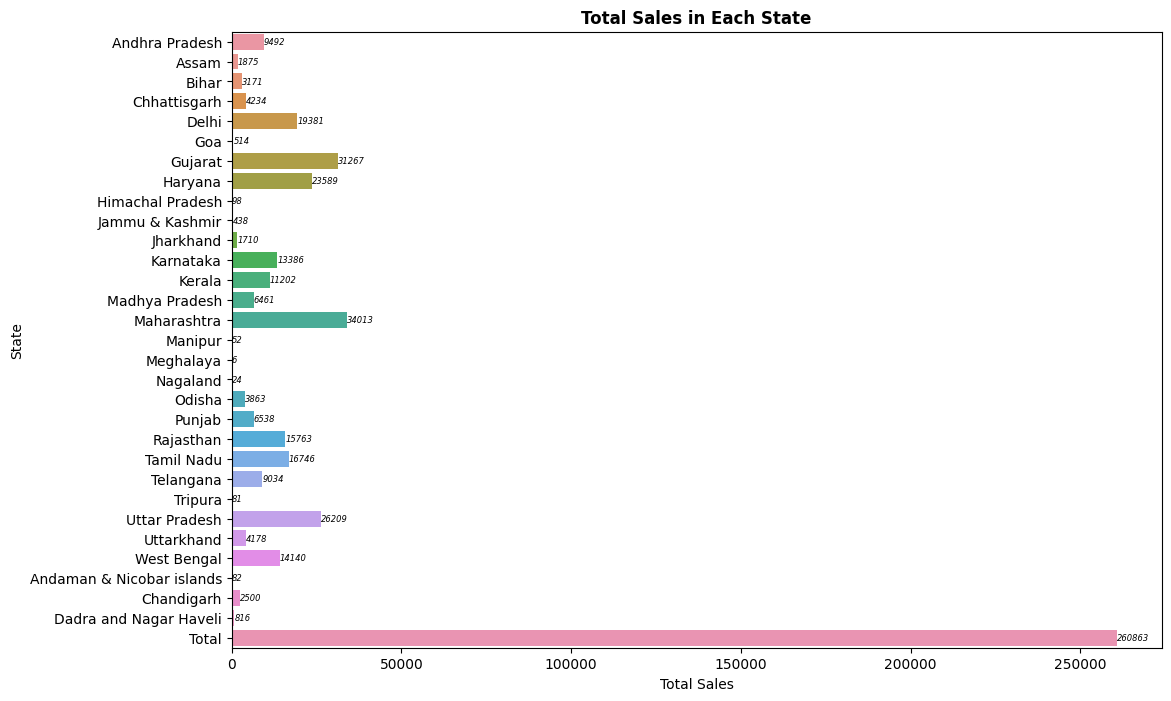

In [49]:
# Visulization

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total in state', y='State', data=EV_s, errorbar=None)

# Add label values to each bar
for index, value in enumerate(EV_s['Total in state']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=6, fontstyle= "oblique")

plt.title('Total Sales in Each State',fontsize = 12, fontweight = "bold")
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


<ipython-input-50-b340dc5b71ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_wheelers_df["Total Two Wheelers"] = two_wheelers_df.iloc[:, 1:].sum(axis=1)


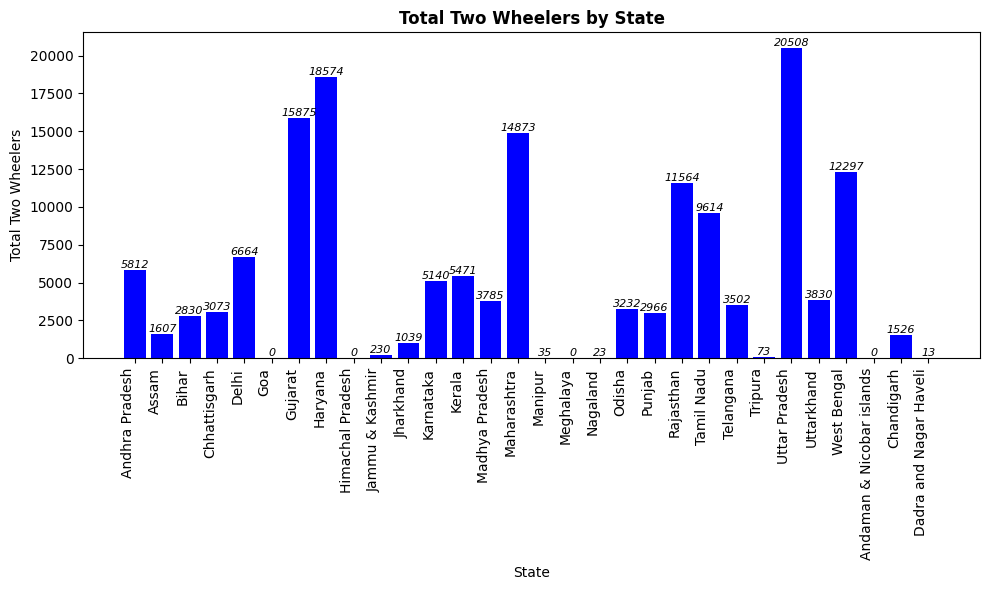

In [50]:
# Droping the Total row
EV_s.drop(index=EV_s[EV_s['State'] == 'Total'].index, inplace=True)

# Adding all two wheelers
two_wheelers_columns = ["State",
    "Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules",
    "Two Wheelers (Category L2 (CMVR))",
    "Two Wheelers (Max power not exceeding 250 Watts)"]

two_wheelers_df = EV_s[two_wheelers_columns]

# Sum the values for all two-wheelers
two_wheelers_df["Total Two Wheelers"] = two_wheelers_df.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(10, 6))

# Adding label values
for index, value in enumerate(two_wheelers_df["Total Two Wheelers"]):
  plt.text(index, value, str(value), ha= 'center', va= 'bottom', fontsize= 8, fontstyle = 'oblique' )

# Plotting
plt.bar(two_wheelers_df["State"], two_wheelers_df["Total Two Wheelers"], color='blue')
plt.xlabel('State')
plt.ylabel('Total Two Wheelers')
plt.title('Total Two Wheelers by State', fontsize = 12, fontweight = "bold")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-51-5d910881be60>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_wheelers_df["Total Three Wheelers"] = three_wheelers_df.iloc[:, 1:].sum(axis=1)


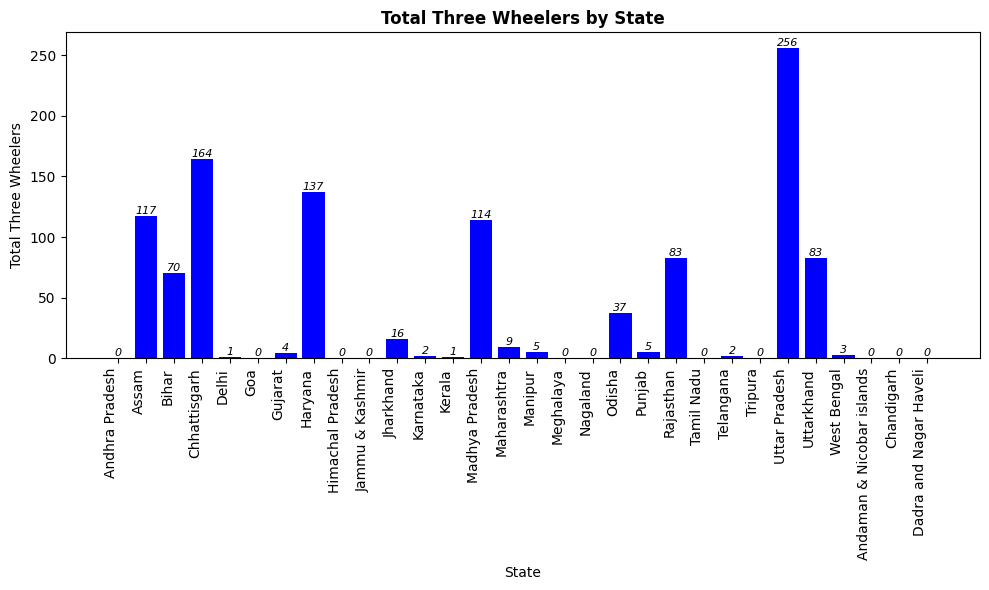

In [51]:
# Adding all three wheelers
three_wheelers_columns = ["State",
    "Three Wheelers (Category L5 slow speed as per CMVR)",
    "Three Wheelers (Category L5 as per CMVR)"]

three_wheelers_df = EV_s[three_wheelers_columns]

# Sum the values for all three-wheelers
three_wheelers_df["Total Three Wheelers"] = three_wheelers_df.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(10, 6))

for index, value in enumerate(three_wheelers_df["Total Three Wheelers"]):
  plt.text(index, value, str(value), ha= 'center', va= 'bottom', fontsize= 8, fontstyle = 'oblique' )

# Plotting
plt.bar(three_wheelers_df["State"], three_wheelers_df["Total Three Wheelers"], color='blue')
plt.xlabel('State')
plt.ylabel('Total Three Wheelers')
plt.title('Total Three Wheelers by State', fontsize = 12, fontweight = "bold")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


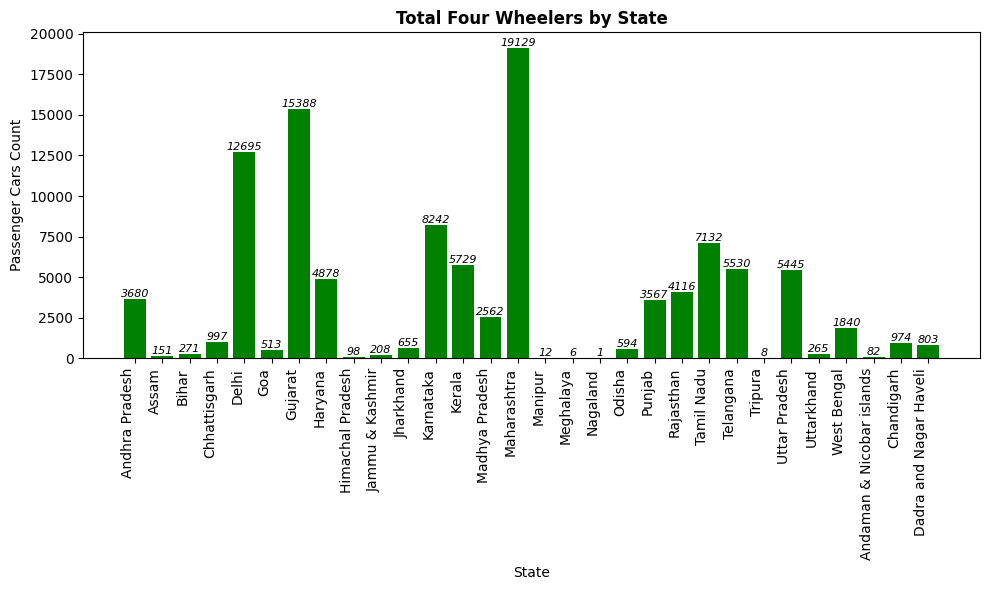

In [52]:
four_wheelers_df = EV_s[EV_s['Passenger Cars (Category M1 as per CMVR)'] > 0]

plt.figure(figsize=(10, 6))

for index, value in enumerate(four_wheelers_df['Passenger Cars (Category M1 as per CMVR)']):
  plt.text(index, value, str(value), ha= 'center', va= 'bottom', fontsize= 8, fontstyle = 'oblique' )

# Plotting
plt.bar(four_wheelers_df['State'], four_wheelers_df['Passenger Cars (Category M1 as per CMVR)'], color='green')
plt.xlabel('State')
plt.ylabel('Passenger Cars Count')
plt.title('Total Four Wheelers by State', fontsize=12, fontweight="bold")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


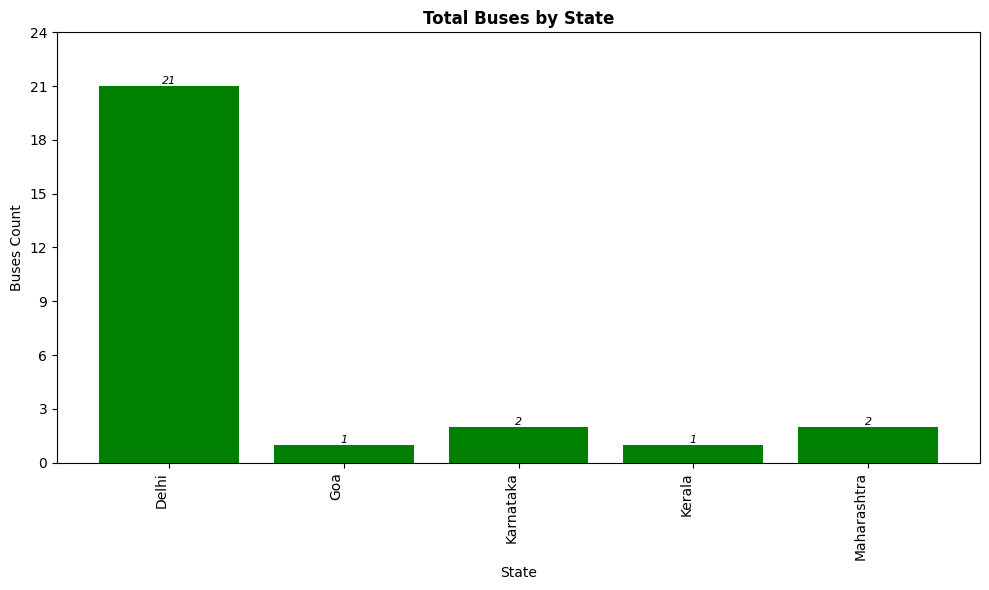

In [53]:
buses_df = EV_s[EV_s['Buses'] > 0]

plt.figure(figsize=(10, 6))

for index, value in enumerate(buses_df["Buses"]):
  plt.text(index, value, str(value), ha= 'center', va= 'bottom', fontsize= 8, fontstyle = 'oblique' )

# Plotting
plt.bar(buses_df['State'], buses_df['Buses'], color='green')
plt.xlabel('State')
plt.ylabel('Buses Count')
plt.title('Total Buses by State', fontsize=12, fontweight="bold")
plt.xticks(rotation=90, ha='right')
plt.yticks(range(0,27,3))
plt.tight_layout()
plt.show()

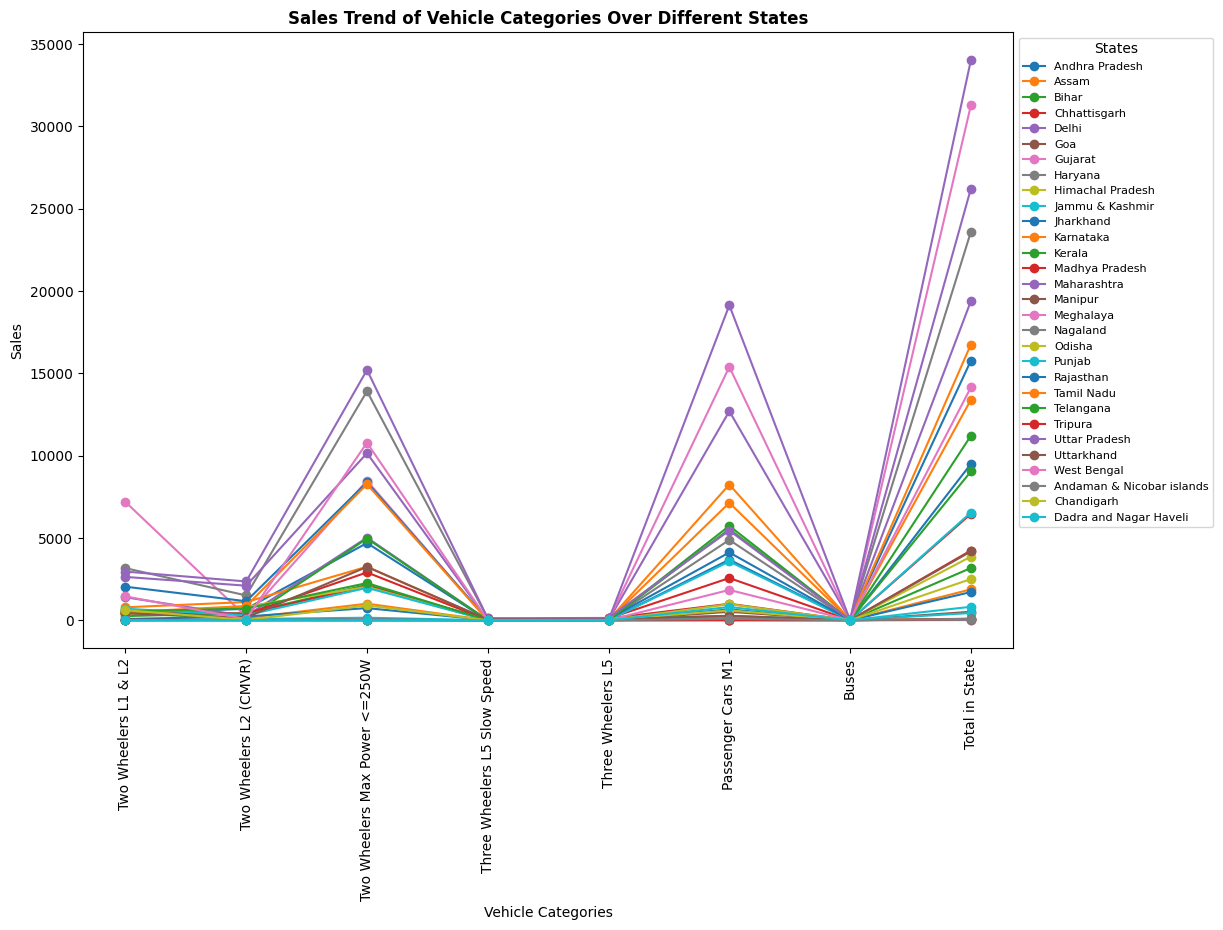

In [54]:
# Line plot


# Renaming columns
column_mapping = {
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': 'Two Wheelers L1 & L2',
    'Two Wheelers (Category L2 (CMVR))': 'Two Wheelers L2 (CMVR)',
    'Two Wheelers (Max power not exceeding 250 Watts)': 'Two Wheelers Max Power <=250W',
    'Three Wheelers (Category L5 slow speed as per CMVR)': 'Three Wheelers L5 Slow Speed',
    'Three Wheelers (Category L5 as per CMVR)': 'Three Wheelers L5',
    'Passenger Cars (Category M1 as per CMVR)': 'Passenger Cars M1',
    'Buses': 'Buses',
    'Total in state': 'Total in State'
}

EV_s.rename(columns=column_mapping, inplace=True)

# Line plot for sales trend over different months
EV_s.set_index('State').T.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Sales Trend of Vehicle Categories Over Different States',fontsize = 12, fontweight = "bold")
plt.xlabel('Vehicle Categories')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.yticks(range(0,36000,5000))
plt.legend(loc= 'upper left',fontsize = 8, bbox_to_anchor= (1,1), title = "States" )
plt.show()


In [55]:
# Loading 3rd data:


EV_c = pd.read_csv("/content/Ev_charging_stations.csv")
EV_c

,Sl. No.,State/UT,No. of Operational PCS
0,1,Andaman and Nicobar,3
1,2,Andhra Pradesh,222
2,3,Arunachal Pradesh,9
3,4,Assam,48
4,5,Bihar,83
5,6,Chandigarh,6
6,7,Chhattisgarh,46
7,8,Delhi,1845
8,9,Goa,44
9,10,Gujarat,195


In [56]:
EV_c.drop(columns=["Sl. No."],axis = 1, inplace = True)
EV_c.head()

,State/UT,No. of Operational PCS
0,Andaman and Nicobar,3
1,Andhra Pradesh,222
2,Arunachal Pradesh,9
3,Assam,48
4,Bihar,83


In [57]:
print(EV_c.info(), "\n\n\n", "Shape :", EV_c. shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State/UT                35 non-null     object
 1   No. of Operational PCS  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes
None 


 Shape : (35, 2)


In [58]:
EV_c.isnull().sum()

State/UT                  0
No. of Operational PCS    0
dtype: int64

In [59]:
# chekcing for duplicates

print(EV_c["State/UT"].value_counts(),"\n\n\n", "Total Values:", EV_c["State/UT"].value_counts().sum())

Andaman and Nicobar                         1
Sikkim                                      1
Meghalaya                                   1
Nagaland                                    1
Odisha                                      1
Puducherry                                  1
Punjab                                      1
Rajasthan                                   1
Tamil Nadu                                  1
Maharashtra                                 1
Telangana                                   1
Tripura                                     1
Dadra and Nagar Haveli and Daman and Diu    1
Uttar Pradesh                               1
Uttarakhand                                 1
West Bengal                                 1
Manipur                                     1
Madhya Pradesh                              1
Andhra Pradesh                              1
Goa                                         1
Arunachal Pradesh                           1
Assam                             

In [60]:
EV_c.describe()

,No. of Operational PCS
count,35.000000
mean,376.342857
std,1132.483501
min,1.000000
25%,17.000000
50%,60.000000
75%,227.000000
max,6586.000000


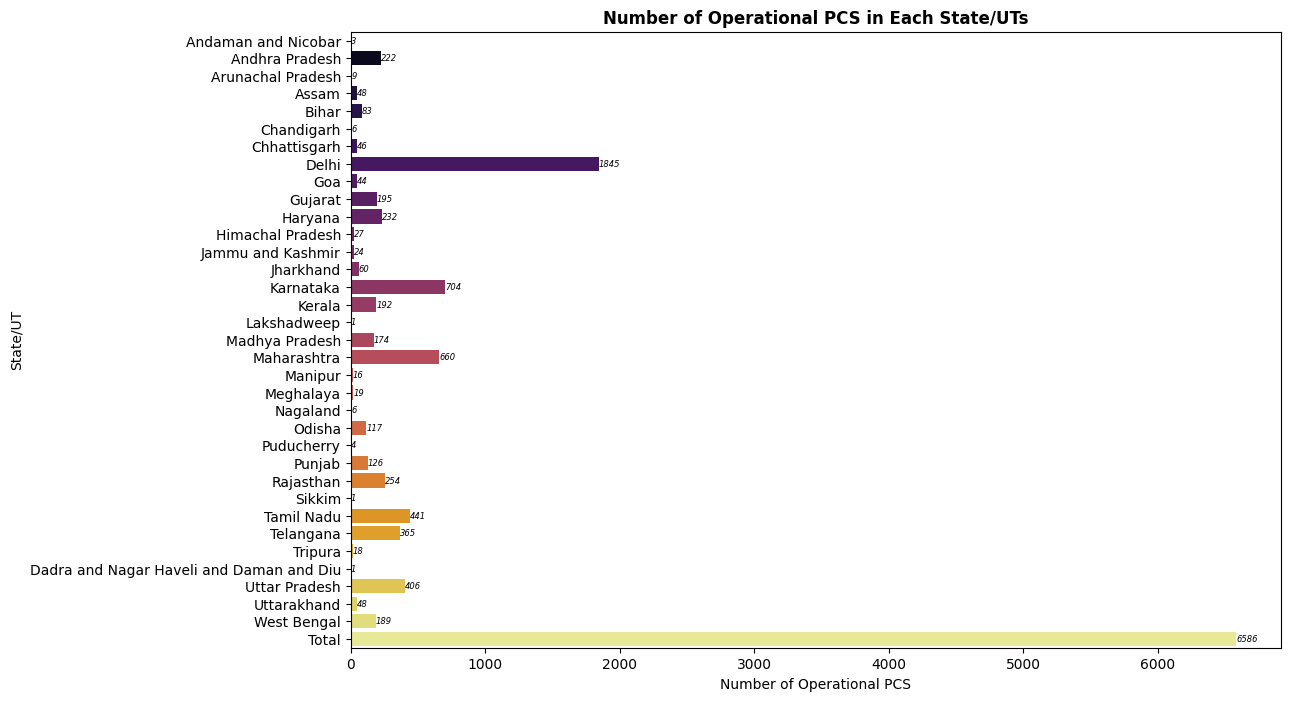

In [61]:
# Visualization:

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='No. of Operational PCS', y='State/UT', data=EV_c, palette='inferno')

# Add label values to each bar
for index, value in enumerate(EV_c['No. of Operational PCS']):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=6, fontstyle = "oblique")

plt.title('Number of Operational PCS in Each State/UTs',fontsize = 12, fontweight = "bold")
plt.xlabel('Number of Operational PCS')
plt.ylabel('State/UT')
plt.show()


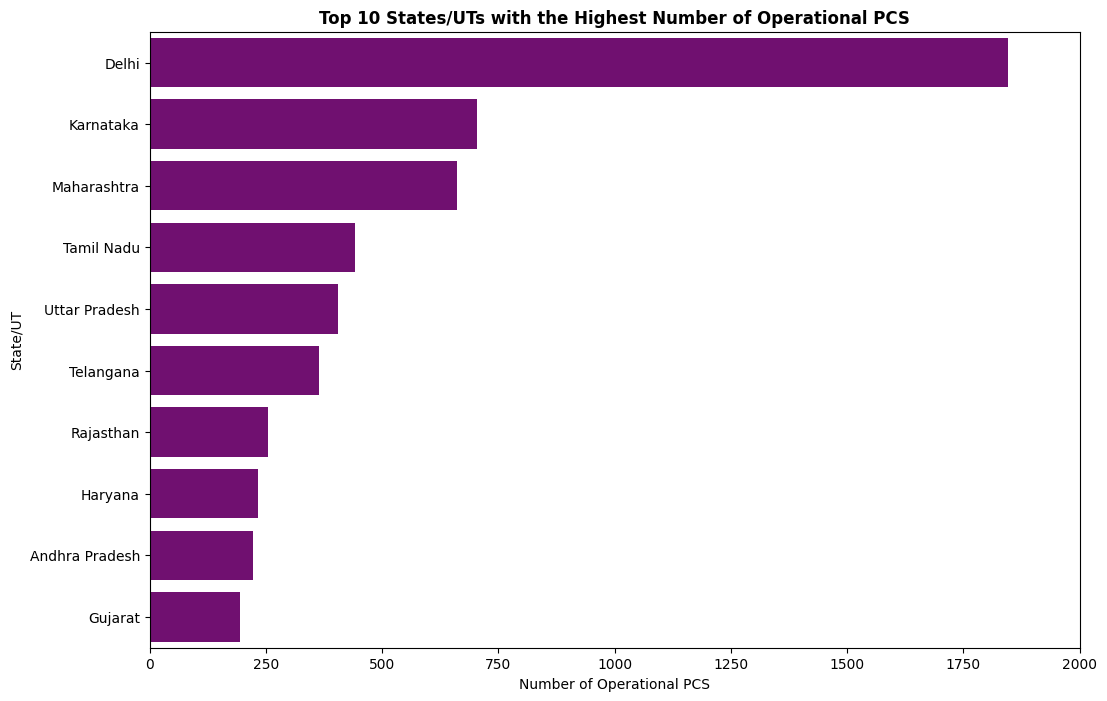

In [62]:
n = 10  # Choose the top N states/UTs to display

# Drop the total row
EV_c.drop(index=EV_c[EV_c['State/UT'] == 'Total'].index, inplace=True)


top_states = EV_c.sort_values(by='No. of Operational PCS', ascending=False).head(n)

plt.figure(figsize=(12, 8))
sns.barplot(x='No. of Operational PCS', y='State/UT', data=top_states, color='purple')
plt.title(f'Top {n} States/UTs with the Highest Number of Operational PCS',fontsize = 12, fontweight = "bold")
plt.xlabel('Number of Operational PCS')
plt.ylabel('State/UT')
plt.xticks(range(0,2001,250))
plt.show()


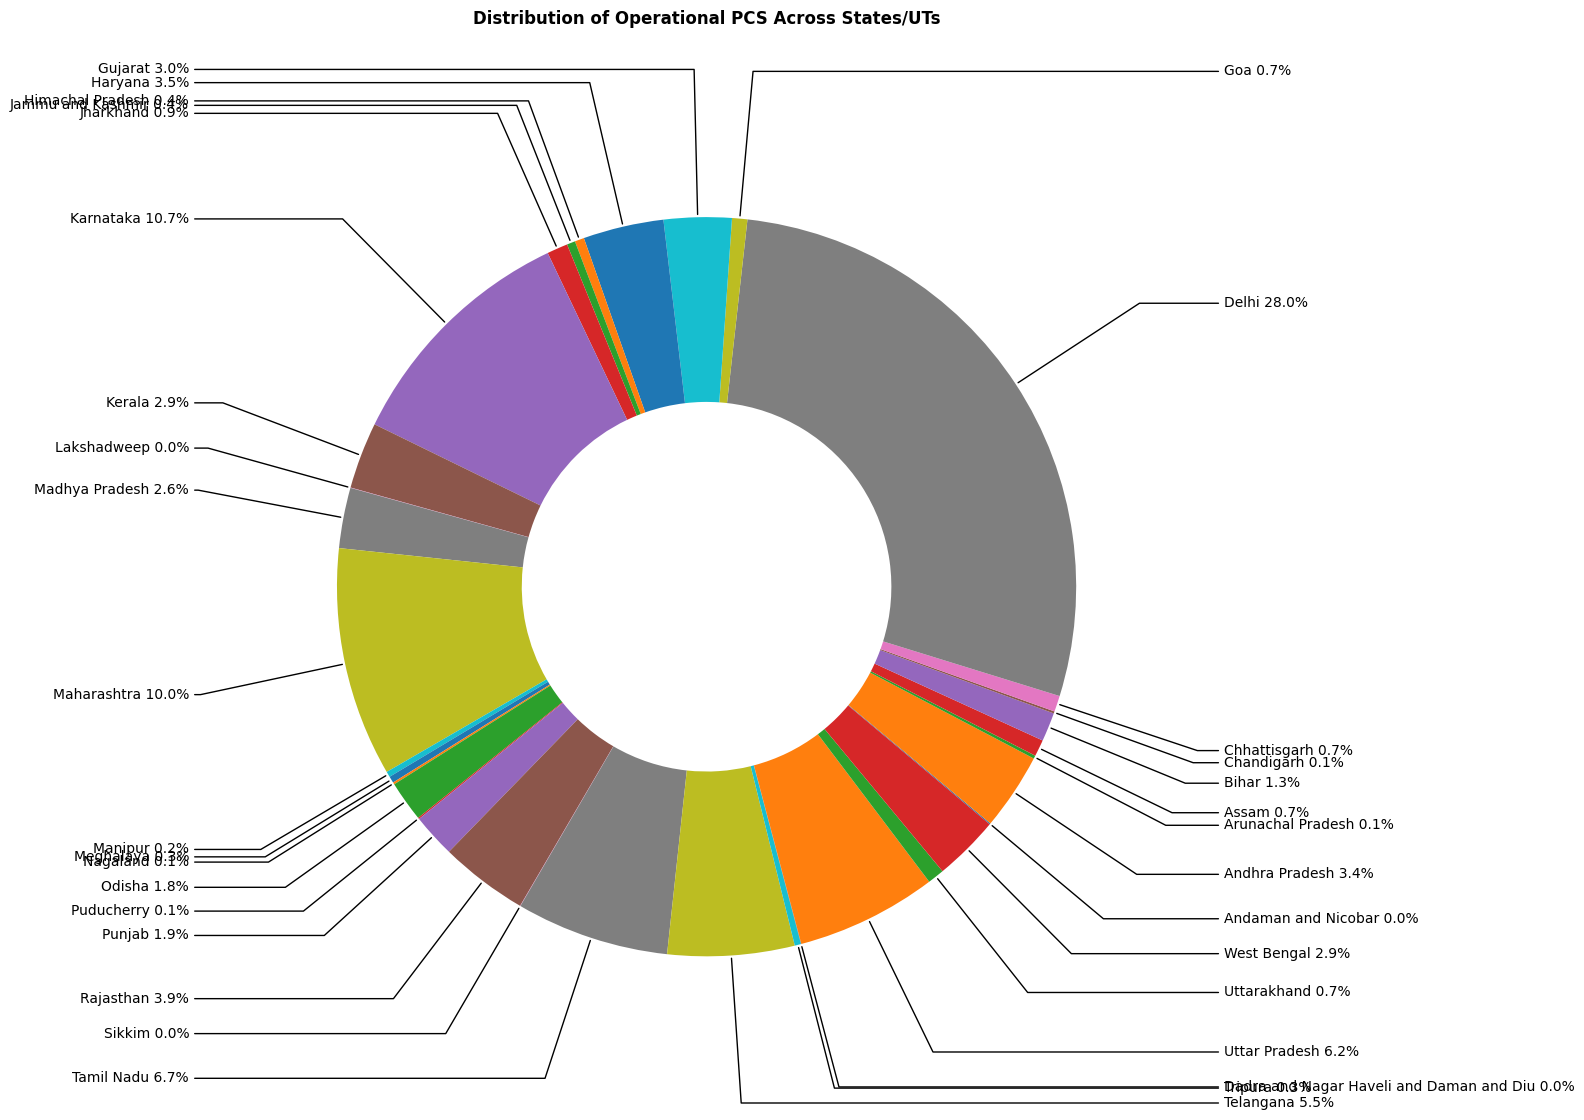

In [63]:
# Pie chart


base_d = EV_c['No. of Operational PCS'].sum()
final_data = {k: m/base_d*100 for k, m in zip(EV_c['State/UT'], EV_c['No. of Operational PCS'])}

fig, ax = plt.subplots(figsize=(18, 12), subplot_kw=dict(aspect="equal"))
recipe = list(final_data.keys())
data = list(final_data.values())
perc = [str(round(e / sum(data) * 100., 1)) + '%' for e in data]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i] + ' ' + perc[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title("Distribution of Operational PCS Across States/UTs", fontsize=12, fontweight="bold",y=1.1)
plt.show()
